# Data Preprocessing #

### Importing the necessary libraries to clean and process the data ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.impute import KNNImputer

### Reading the dataset ###

In [2]:
# pd.read_csv() --> reading the dataset into notebook work sheet

df = pd.read_csv("C:\\Users\\SENTHURAN\\Downloads\\archive\\Life Expectancy Data.csv")

In [3]:
# head() --> shows the first 5 records from the dataset

df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# tail() --> shows the last 5 records from the dataset

df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2966,Albania,2000,Developing,72.6,11.0,1,3.66,91.711541,96.0,662,...,97.0,6.26,97.0,0.1,1175.788981,38927.0,2.1,2.2,0.656,10.7
2967,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
2968,Algeria,2014,Developing,75.4,11.0,21,0.01,54.237318,95.0,0,...,95.0,7.21,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4
2969,Algeria,2013,Developing,75.3,112.0,21,0.53,544.450743,95.0,25,...,95.0,7.12,95.0,0.1,5471.866766,38338562.0,5.9,5.8,0.737,14.4
2970,Algeria,2012,Developing,75.1,113.0,21,0.66,555.926083,95.0,18,...,95.0,6.14,95.0,0.1,5564.825660,37565847.0,5.9,5.8,0.732,14.4


In [5]:
# shape --> It returns the total number of rows and columns present in the dataset

df.shape

(2971, 22)

In [6]:
# info() --> gives the summary of the dataset about indexes, columns, data types etc.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2971 entries, 0 to 2970
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2971 non-null   object 
 1   Year                             2971 non-null   int64  
 2   Status                           2971 non-null   object 
 3   Life expectancy                  2961 non-null   float64
 4   Adult Mortality                  2961 non-null   float64
 5   infant deaths                    2971 non-null   int64  
 6   Alcohol                          2776 non-null   float64
 7   percentage expenditure           2971 non-null   float64
 8   Hepatitis B                      2405 non-null   float64
 9   Measles                          2971 non-null   int64  
 10   BMI                             2937 non-null   float64
 11  under-five deaths                2952 non-null   float64
 12  Polio               

### Handling missing values and duplicate values ###

In [7]:
# isnull --> used to identiy the null records present in the dataset

df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            195
percentage expenditure               0
Hepatitis B                        566
Measles                              0
 BMI                                34
under-five deaths                   19
Polio                               19
Total expenditure                  227
Diphtheria                          19
 HIV/AIDS                            0
GDP                                456
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
## Calculating the percentage of null values in the dataset

df.isnull().sum()/df.shape[0]*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.336587
Adult Mortality                     0.336587
infant deaths                       0.000000
Alcohol                             6.563447
percentage expenditure              0.000000
Hepatitis B                        19.050825
Measles                             0.000000
 BMI                                1.144396
under-five deaths                   0.639515
Polio                               0.639515
Total expenditure                   7.640525
Diphtheria                          0.639515
 HIV/AIDS                           0.000000
GDP                                15.348368
Population                         21.945473
 thinness  1-19 years               1.144396
 thinness 5-9 years                 1.144396
Income composition of resources     5.621003
Schooling                           5.486368
dtype: flo

In [9]:
## warnings --> used to ignore the warning messages in the output
import warnings
warnings.filterwarnings("ignore")

## KNNImputer() --> used to fill the missing values by k nearest neighbors approach 
impute = KNNImputer()
for i in df.select_dtypes(include='number').columns:
    df[i] = impute.fit_transform(df[[i]])                                            

In [10]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [11]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015.0,Developing,65.0,263.0,62.0,0.010000,71.279624,65.0,1154.0,...,6.0,8.16000,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014.0,Developing,59.9,271.0,64.0,0.010000,73.523582,62.0,492.0,...,58.0,8.18000,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013.0,Developing,59.9,268.0,66.0,0.010000,73.219243,64.0,430.0,...,62.0,8.13000,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012.0,Developing,59.5,272.0,69.0,0.010000,78.184215,67.0,2787.0,...,67.0,8.52000,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011.0,Developing,59.2,275.0,71.0,0.010000,7.097109,68.0,3013.0,...,68.0,7.87000,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,Albania,2000.0,Developing,72.6,11.0,1.0,3.660000,91.711541,96.0,662.0,...,97.0,6.26000,97.0,0.1,1175.788981,38927.0,2.1,2.2,0.656,10.7
2967,Algeria,2015.0,Developing,75.6,19.0,21.0,4.578253,0.000000,95.0,63.0,...,95.0,5.95027,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
2968,Algeria,2014.0,Developing,75.4,11.0,21.0,0.010000,54.237318,95.0,0.0,...,95.0,7.21000,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4
2969,Algeria,2013.0,Developing,75.3,112.0,21.0,0.530000,544.450743,95.0,25.0,...,95.0,7.12000,95.0,0.1,5471.866766,38338562.0,5.9,5.8,0.737,14.4


In [12]:
## Finding number of duplicate values present in the dataset

df.duplicated().sum()

33

In [13]:
## Keeping only the unique records and deleting the duplicated records from the dataset by using drop

df1 = df.drop_duplicates()

In [14]:
## verifying if the duplicate records deleted or not

df1.duplicated().sum()

0

### Analysing outlier and relationship between the data by visualization ###

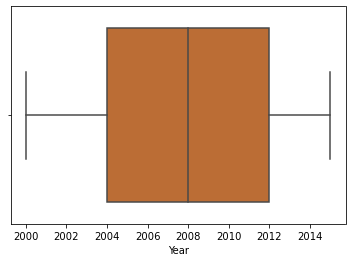

<Figure size 900x600 with 0 Axes>

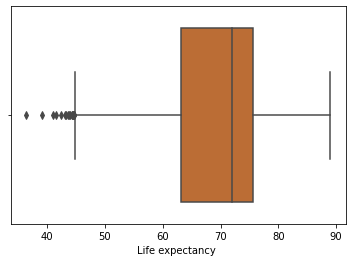

<Figure size 900x600 with 0 Axes>

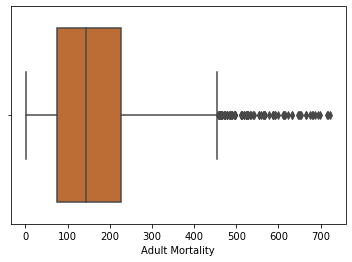

<Figure size 900x600 with 0 Axes>

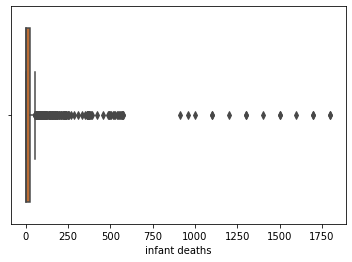

<Figure size 900x600 with 0 Axes>

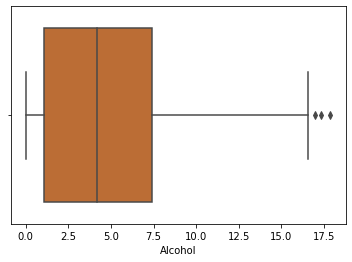

<Figure size 900x600 with 0 Axes>

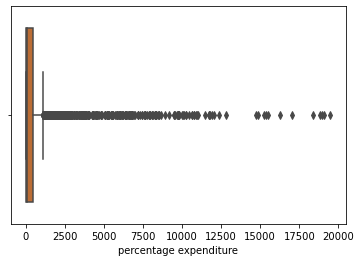

<Figure size 900x600 with 0 Axes>

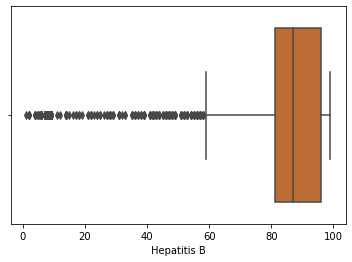

<Figure size 900x600 with 0 Axes>

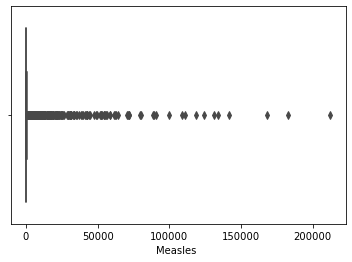

<Figure size 900x600 with 0 Axes>

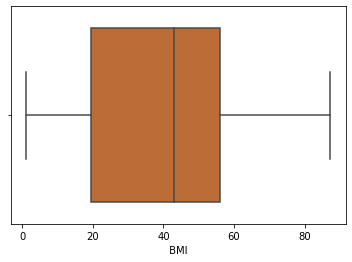

<Figure size 900x600 with 0 Axes>

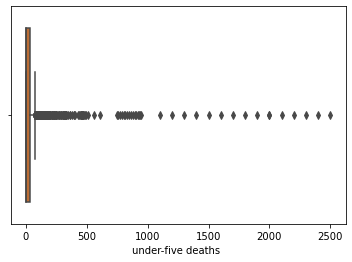

<Figure size 900x600 with 0 Axes>

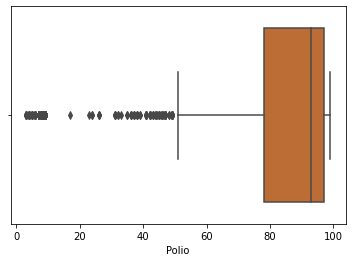

<Figure size 900x600 with 0 Axes>

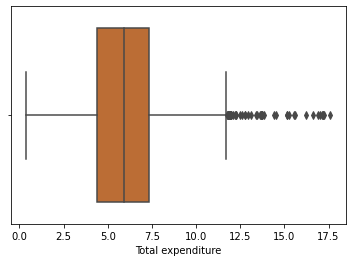

<Figure size 900x600 with 0 Axes>

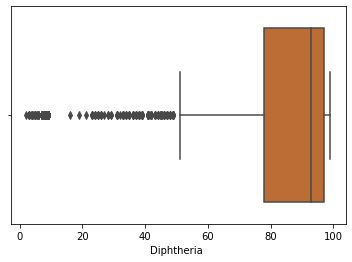

<Figure size 900x600 with 0 Axes>

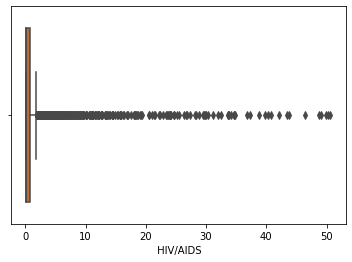

<Figure size 900x600 with 0 Axes>

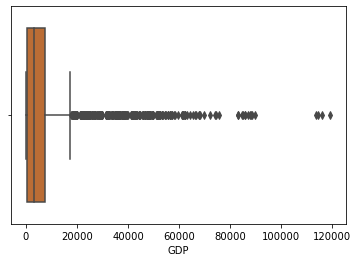

<Figure size 900x600 with 0 Axes>

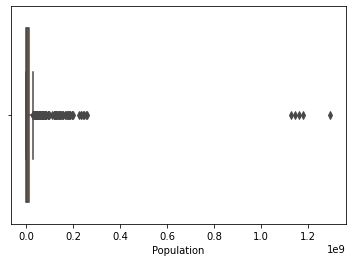

<Figure size 900x600 with 0 Axes>

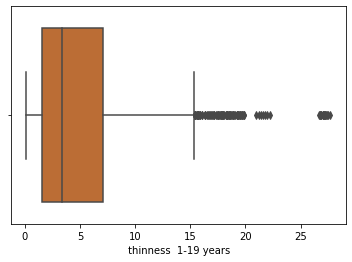

<Figure size 900x600 with 0 Axes>

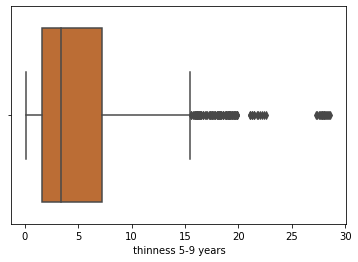

<Figure size 900x600 with 0 Axes>

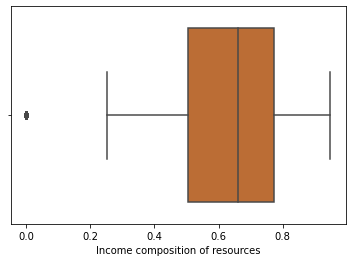

<Figure size 900x600 with 0 Axes>

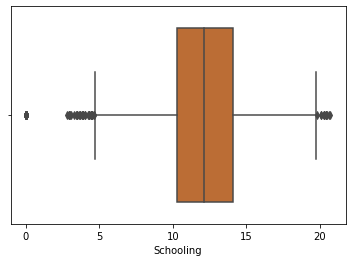

<Figure size 900x600 with 0 Axes>

In [15]:
## Boxplot to identify the outlier

for i in df1.select_dtypes(include='number').columns:
    sns.boxplot(data=df1,x=i,color='chocolate')
    plt.figure(dpi=150)
    plt.show()

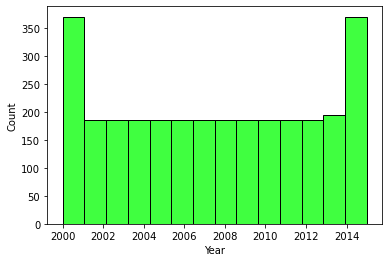

<Figure size 900x600 with 0 Axes>

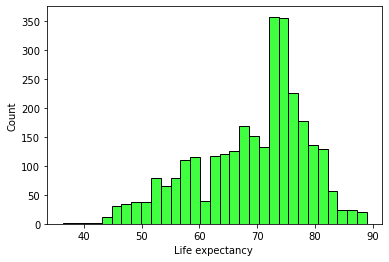

<Figure size 900x600 with 0 Axes>

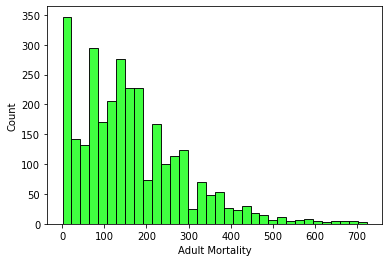

<Figure size 900x600 with 0 Axes>

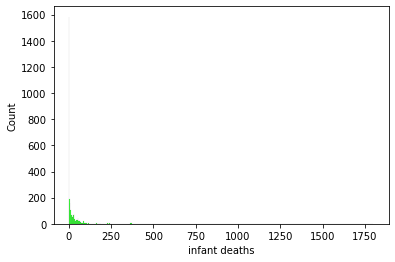

<Figure size 900x600 with 0 Axes>

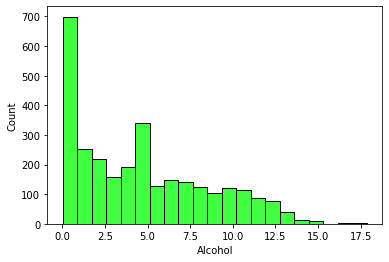

<Figure size 900x600 with 0 Axes>

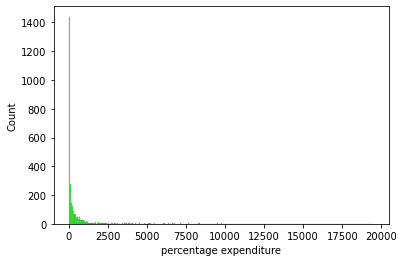

<Figure size 900x600 with 0 Axes>

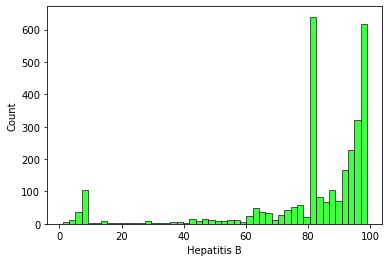

<Figure size 900x600 with 0 Axes>

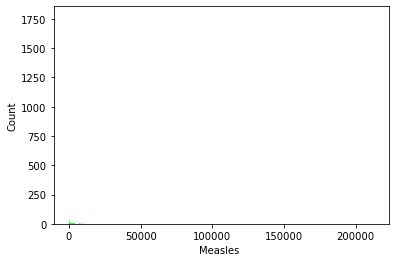

<Figure size 900x600 with 0 Axes>

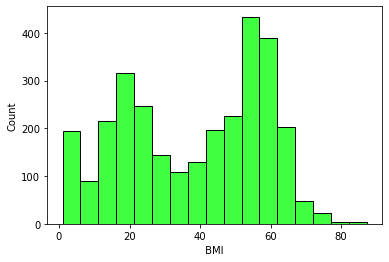

<Figure size 900x600 with 0 Axes>

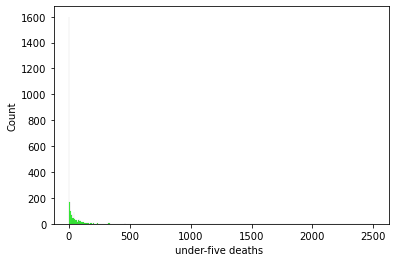

<Figure size 900x600 with 0 Axes>

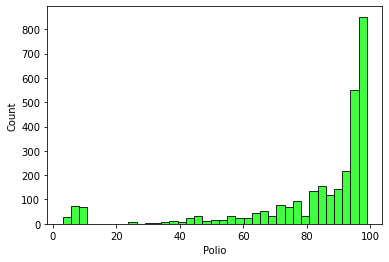

<Figure size 900x600 with 0 Axes>

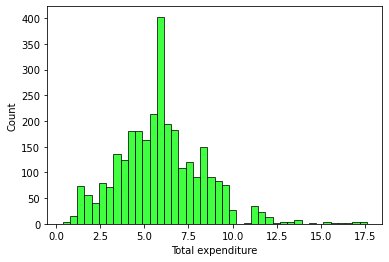

<Figure size 900x600 with 0 Axes>

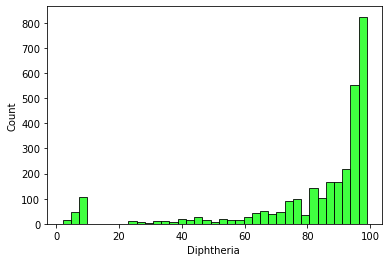

<Figure size 900x600 with 0 Axes>

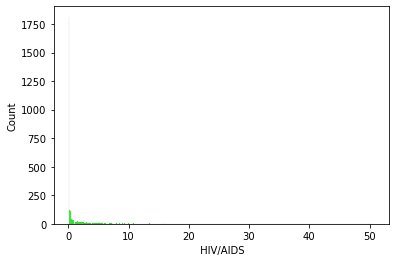

<Figure size 900x600 with 0 Axes>

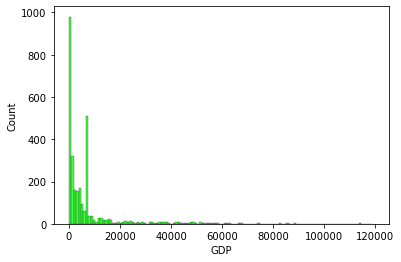

<Figure size 900x600 with 0 Axes>

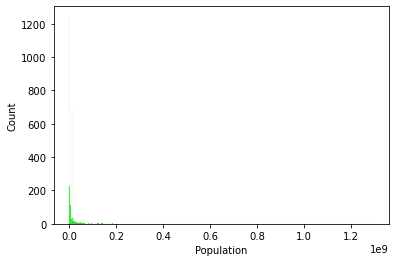

<Figure size 900x600 with 0 Axes>

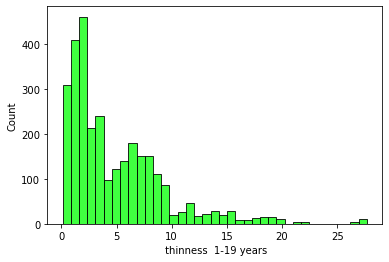

<Figure size 900x600 with 0 Axes>

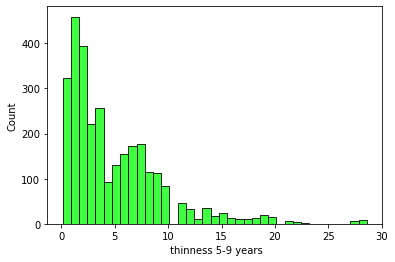

<Figure size 900x600 with 0 Axes>

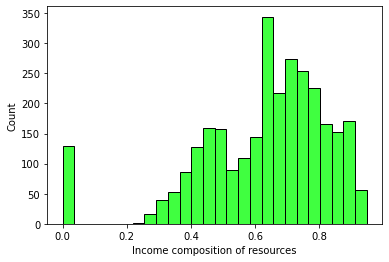

<Figure size 900x600 with 0 Axes>

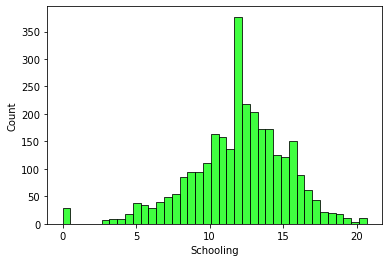

<Figure size 900x600 with 0 Axes>

In [16]:
##histplot

for i in df1.select_dtypes(include='number').columns:
    sns.histplot(data=df,x=i,color='lime')
    plt.figure(dpi=150)
    plt.show()

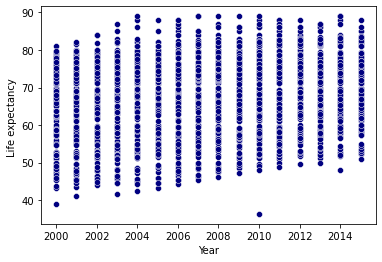

<Figure size 900x600 with 0 Axes>

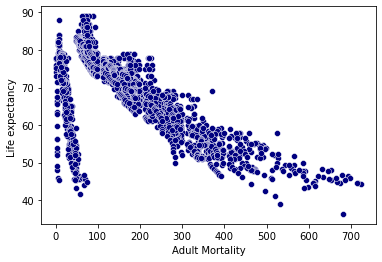

<Figure size 900x600 with 0 Axes>

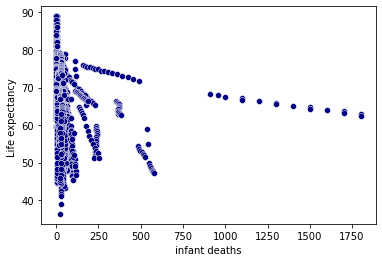

<Figure size 900x600 with 0 Axes>

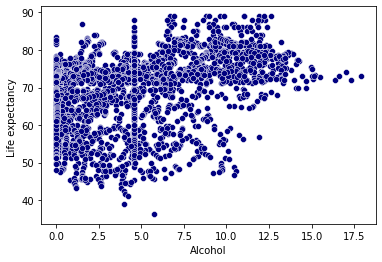

<Figure size 900x600 with 0 Axes>

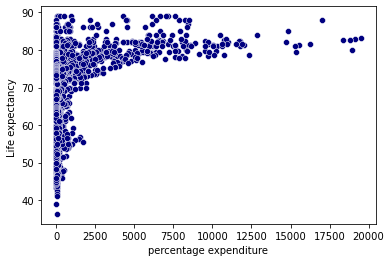

<Figure size 900x600 with 0 Axes>

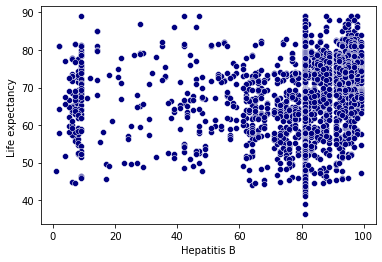

<Figure size 900x600 with 0 Axes>

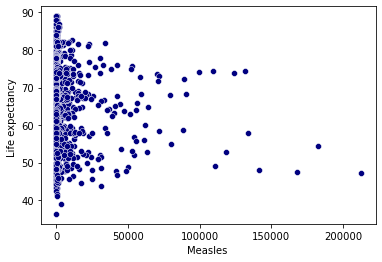

<Figure size 900x600 with 0 Axes>

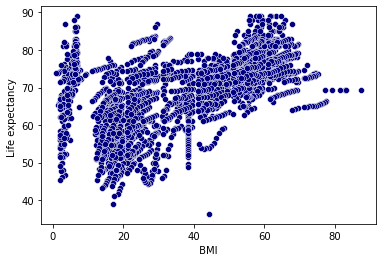

<Figure size 900x600 with 0 Axes>

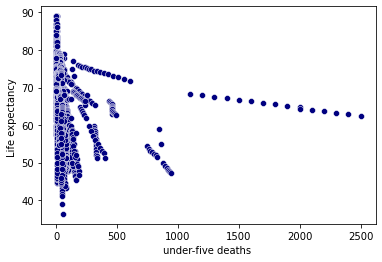

<Figure size 900x600 with 0 Axes>

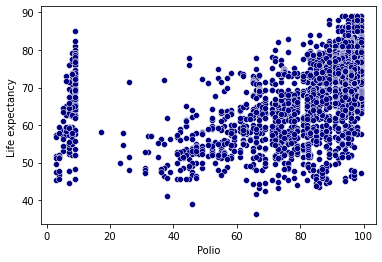

<Figure size 900x600 with 0 Axes>

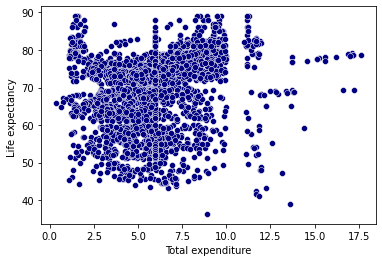

<Figure size 900x600 with 0 Axes>

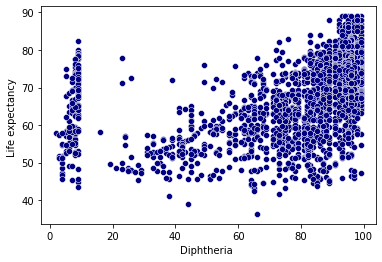

<Figure size 900x600 with 0 Axes>

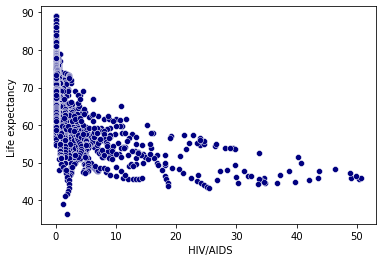

<Figure size 900x600 with 0 Axes>

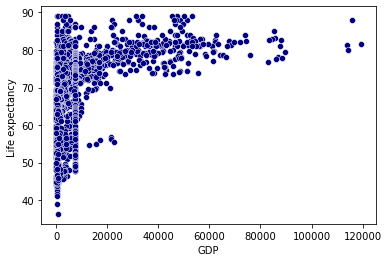

<Figure size 900x600 with 0 Axes>

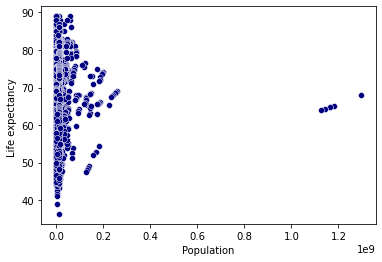

<Figure size 900x600 with 0 Axes>

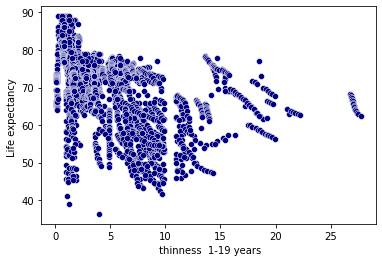

<Figure size 900x600 with 0 Axes>

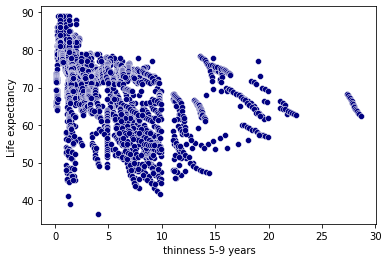

<Figure size 900x600 with 0 Axes>

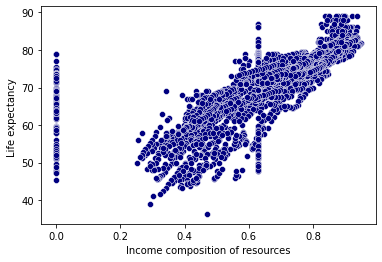

<Figure size 900x600 with 0 Axes>

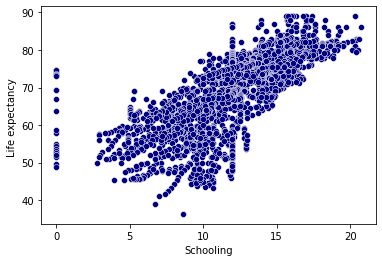

<Figure size 900x600 with 0 Axes>

In [17]:
## Scatterplot to check the relationship between the data

for i in['Year','Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling']:
    sns.scatterplot(data=df1,x=i,y='Life expectancy ', color='navy')
    plt.figure(dpi=150)
    plt.show()

In [18]:
## corr() --> correlation between the data

df1.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169618,-0.078871,-0.037415,-0.048779,0.031400,0.085613,-0.082493,0.108326,-0.043167,0.093829,0.082341,0.133863,-0.139741,0.093814,0.014945,-0.047586,-0.050622,0.236328,0.203466
Life expectancy,0.169618,1.000000,-0.696359,-0.196534,0.391567,0.381792,0.204488,-0.157573,0.559263,-0.221866,0.461585,0.207977,0.475429,-0.556455,0.430390,-0.019694,-0.472263,-0.466712,0.692507,0.715126
Adult Mortality,-0.078871,-0.696359,1.000000,0.078749,-0.190416,-0.242811,-0.141137,0.031176,-0.381471,0.093885,-0.272704,-0.110854,-0.273024,0.523730,-0.277007,-0.012458,0.299959,0.305447,-0.440091,-0.435165
infant deaths,-0.037415,-0.196534,0.078749,1.000000,-0.113791,-0.085612,-0.180861,0.501128,-0.227221,0.996433,-0.170672,-0.126582,-0.175155,0.025231,-0.106923,0.548554,0.465600,0.471236,-0.143679,-0.191795
Alcohol,-0.048779,0.391567,-0.190416,-0.113791,1.000000,0.339787,0.071112,-0.051019,0.317990,-0.109285,0.213749,0.294856,0.215222,-0.048581,0.318106,-0.030728,-0.416957,-0.405887,0.416032,0.497460
percentage expenditure,0.031400,0.381792,-0.242811,-0.085612,0.339787,1.000000,0.010686,-0.056596,0.228541,-0.088470,0.147207,0.173270,0.143574,-0.097857,0.888700,-0.024601,-0.251222,-0.252751,0.380416,0.388200
Hepatitis B,0.085613,0.204488,-0.141137,-0.180861,0.071112,0.010686,1.000000,-0.091040,0.136719,-0.186542,0.405104,0.050717,0.501427,-0.104427,0.061048,-0.111986,-0.107834,-0.110986,0.152616,0.170936
Measles,-0.082493,-0.157573,0.031176,0.501128,-0.051019,-0.056596,-0.091040,1.000000,-0.175925,0.507613,-0.136144,-0.104596,-0.141859,0.030899,-0.067970,0.236261,0.224736,0.221002,-0.115802,-0.122696
BMI,0.108326,0.559263,-0.381471,-0.227221,0.317990,0.228541,0.136719,-0.175925,1.000000,-0.236594,0.282160,0.231838,0.281062,-0.243548,0.276489,-0.063278,-0.532025,-0.538911,0.479874,0.508184
under-five deaths,-0.043167,-0.221866,0.093885,0.996433,-0.109285,-0.088470,-0.186542,0.507613,-0.236594,1.000000,-0.188281,-0.127957,-0.195005,0.037548,-0.110624,0.535941,0.466919,0.471385,-0.160506,-0.207133


### Handling Outliers ###

In [19]:
## percentile --> the data divided into equal parts as 0%,25%,50%,75%,100%
## Whiskers --> box plots extend from the quartiles to cover the range of the data, excluding outliers.

def wisker(col):
    q1,q3 = np.percentile(col,[25,75])
    IQR = q3 - q1
    lower = q1 - 1.5*IQR # formula for lower whisker 
    upper = q3 + 1.5*IQR # formula for upper whisker
    return lower,upper

In [20]:
wisker(df1['GDP'])

(-9642.837477757137, 17619.36111759523)

In [21]:
## handling outlier for the mentioned columns in the for loop.
for i in ['GDP','Total expenditure',' thinness  1-19 years',
       ' thinness 5-9 years','Diphtheria ','Alcohol','infant deaths','Population',
          'percentage expenditure','Adult Mortality','Income composition of resources']:
    lower,upper = wisker(df1[i])
    df1[i] = np.where(df1[i]<lower,lower,df1[i]) # if the lower whisker is less than the data then lower whisker updates else remains the data same
    df1[i] = np.where(df1[i]>upper,upper,df1[i]) # if the upper whisker is greater than the data then upper whisker updates else remains the data same

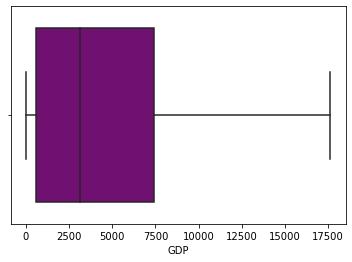

<Figure size 900x600 with 0 Axes>

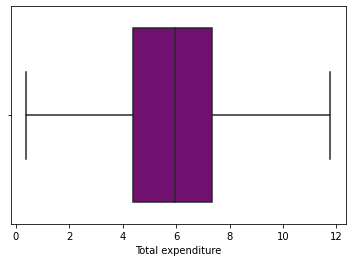

<Figure size 900x600 with 0 Axes>

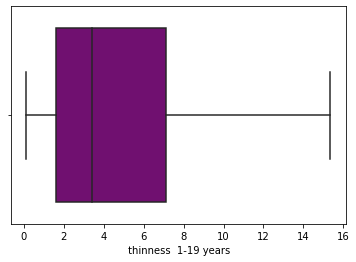

<Figure size 900x600 with 0 Axes>

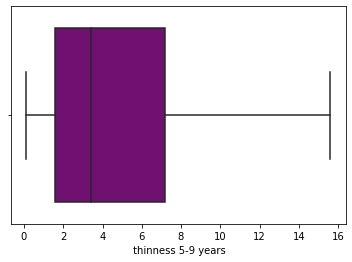

<Figure size 900x600 with 0 Axes>

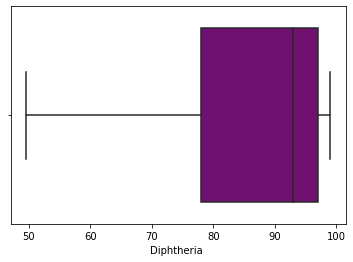

<Figure size 900x600 with 0 Axes>

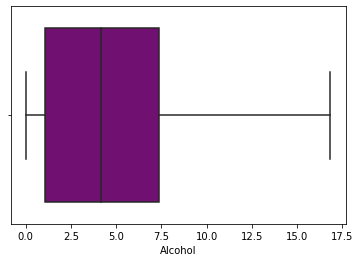

<Figure size 900x600 with 0 Axes>

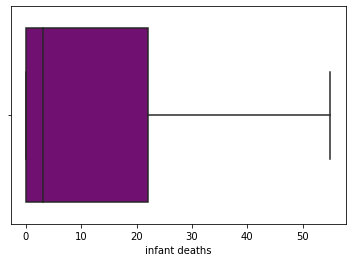

<Figure size 900x600 with 0 Axes>

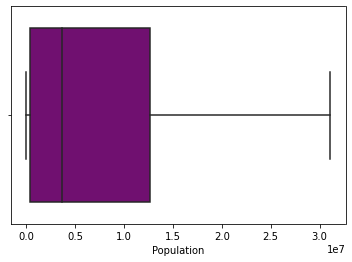

<Figure size 900x600 with 0 Axes>

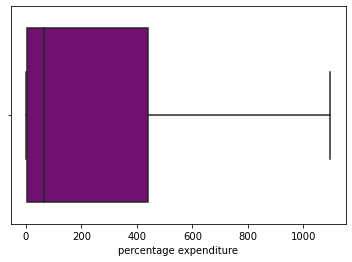

<Figure size 900x600 with 0 Axes>

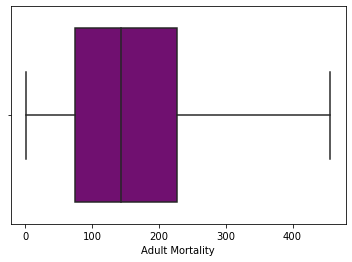

<Figure size 900x600 with 0 Axes>

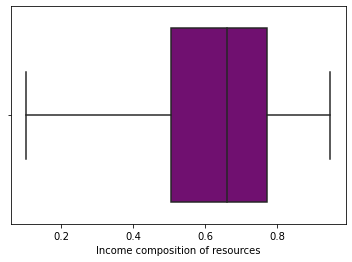

<Figure size 900x600 with 0 Axes>

In [22]:
#warnings --> to ignore the warning messages in the output
import warnings
warnings.filterwarnings("ignore")

## visualizing the data after outlier handled
for i in ['GDP','Total expenditure',' thinness  1-19 years',
       ' thinness 5-9 years','Diphtheria ','Alcohol','infant deaths','Population',
          'percentage expenditure','Adult Mortality','Income composition of resources']:
    sns.boxplot(df1[i],color='purple')
    plt.figure(dpi=150)
    plt.show()

### Saving the cleaned data into the directory ###

In [23]:
df1.to_csv("C:\\Users\\SENTHURAN\\OneDrive\\Desktop\\CleanedData.csv",header=True)

In [24]:
## describe --> gives the summary and statistical calculations of the data

df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.000000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2938.0,6.922489e+01,9.507640e+00,36.300000,63.200000,7.200000e+01,7.560000e+01,8.900000e+01
Adult Mortality,2938.0,1.620231e+02,1.154838e+02,1.000000,74.000000,1.440000e+02,2.270000e+02,4.565000e+02
infant deaths,2938.0,1.363513e+01,1.910893e+01,0.000000,0.000000,3.000000e+00,2.200000e+01,5.500000e+01
Alcohol,2938.0,4.600670e+00,3.914468e+00,0.010000,1.092500,4.160000e+00,7.390000e+00,1.683625e+01
percentage expenditure,2938.0,2.840458e+02,3.894556e+02,0.000000,4.685343,6.491291e+01,4.415341e+02,1.096807e+03
Hepatitis B,2938.0,8.108253e+01,2.243024e+01,1.000000,81.120998,8.700000e+01,9.600000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.000000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2938.0,3.832103e+01,1.992768e+01,1.000000,19.400000,4.300000e+01,5.610000e+01,8.730000e+01
under-five deaths,2938.0,4.229672e+01,1.604127e+02,0.000000,0.000000,4.000000e+00,3.000000e+01,2.500000e+03


In [25]:
## It gives the object data type columns descriptions

df1.describe(include ='object')

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


#### Average life expectancy  by status of the country ####

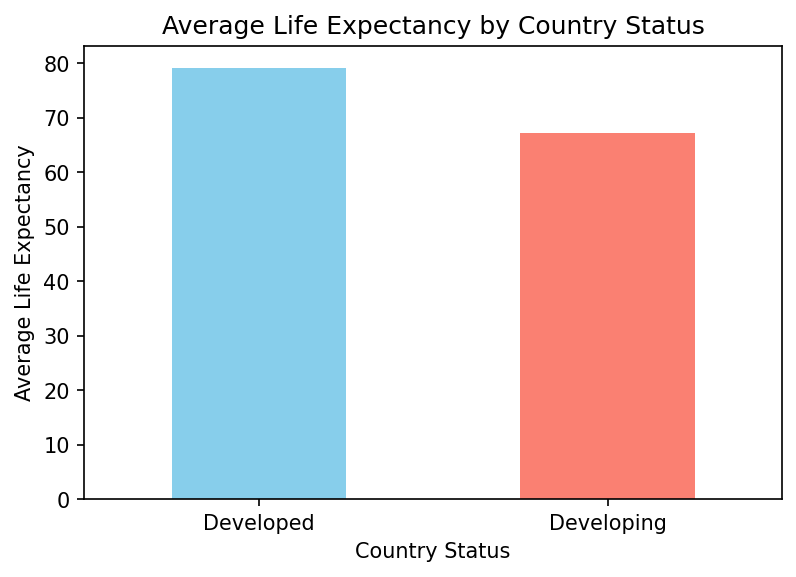

In [26]:
## General Analysis about the dataset 
## This plot shows the average life expectancy for Developed and Developing countries.

avg_life_expectancy = df1.groupby('Status')['Life expectancy '].mean()

# Plotting
plt.figure(dpi=150) ## dpi --> depth point intensity ( clarity purpose )
avg_life_expectancy.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Life Expectancy by Country Status')
plt.ylabel('Average Life Expectancy')
plt.xlabel('Country Status')
plt.xticks(rotation=0)
plt.show()

#### Average Life Expectancy over the Years ####

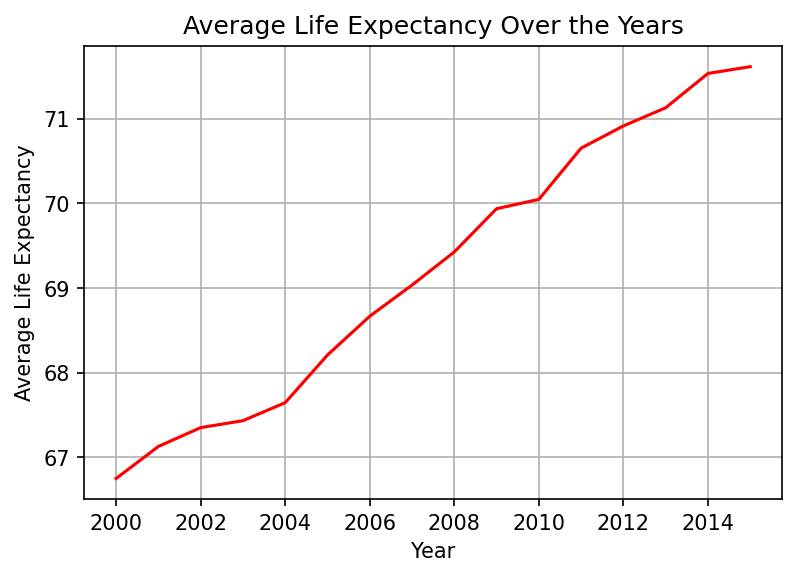

In [27]:
## This line plot shows the trend of average life expectancy over the years.
# Calculate the average life expectancy by year
avg_life_expectancy_year = df1.groupby('Year')['Life expectancy '].mean()

# Plotting
plt.figure(dpi=150)
avg_life_expectancy_year.plot(kind='line', color='red')
plt.title('Average Life Expectancy Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.grid(True)
plt.show()

#### Population vs Life Expectancy ####

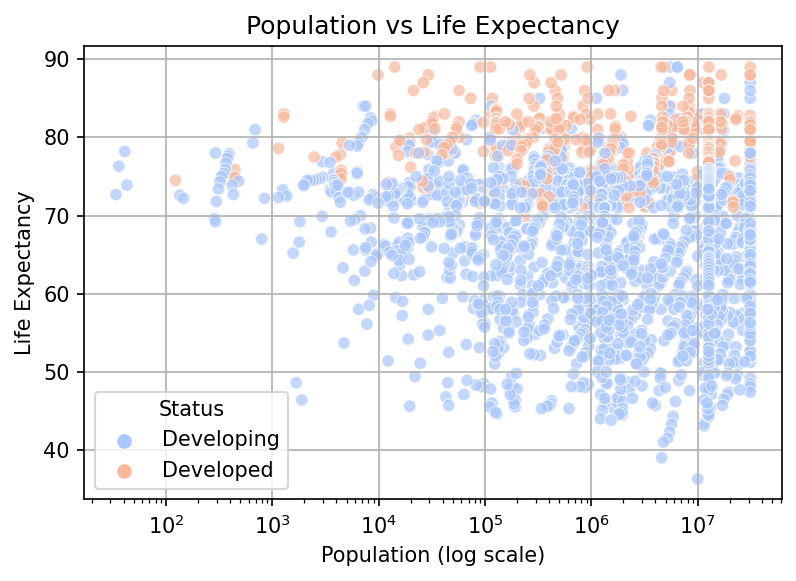

In [28]:
## This scatter plot visualizes the relationship between Population and Life Expectancy.
plt.figure(dpi=150)
sns.scatterplot(data=df1, x='Population', y='Life expectancy ', hue='Status', palette='coolwarm', alpha=0.7)
plt.xscale('log')  # Log scale for better visualization
plt.title('Population vs Life Expectancy')
plt.xlabel('Population (log scale)')
plt.grid(True)
plt.ylabel('Life Expectancy')
plt.show()

#### Average Alcohol Consumption of Developing and Developed Countries ####

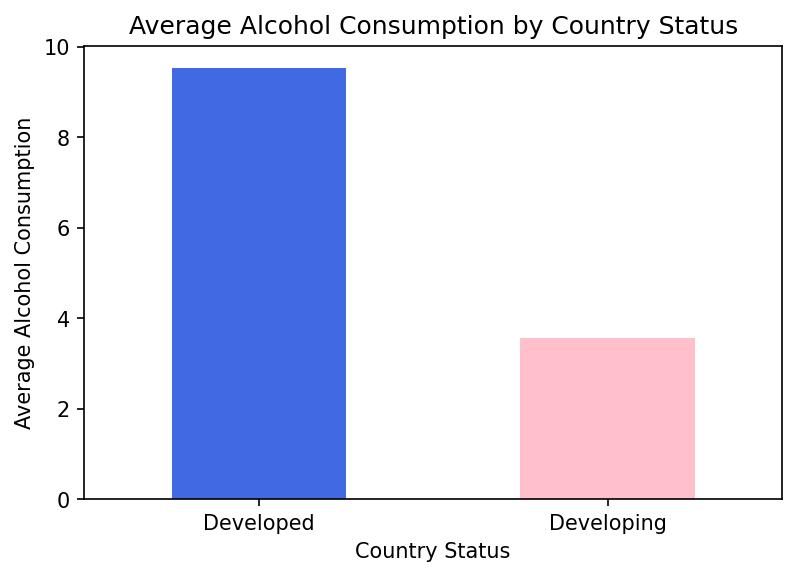

In [29]:
#This bar plot compares the average alcohol consumption between Developed and Developing countries.
# Calculate the average alcohol consumption by status

avg_alcohol_consumption = df1.groupby('Status')['Alcohol'].mean()

# Plotting
plt.figure(dpi=150)
avg_alcohol_consumption.plot(kind='bar', color=['royalblue', 'pink'])
plt.title('Average Alcohol Consumption by Country Status')
plt.ylabel('Average Alcohol Consumption')
plt.xlabel('Country Status')
plt.xticks(rotation=0)
plt.show()

#### Impact of Healthcare Expenditure on Life Expectancy ####

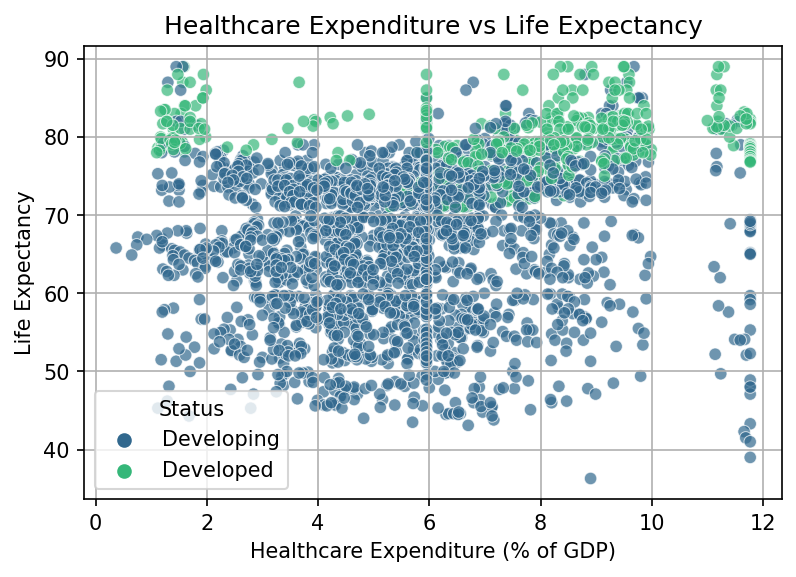

In [30]:
#What is the relationship between healthcare expenditure (as a percentage of GDP) and life expectancy across different countries?
plt.figure(dpi=150)
sns.scatterplot(data=df1, x='Total expenditure', y='Life expectancy ', hue='Status', palette='viridis', alpha=0.7)
plt.title('Healthcare Expenditure vs Life Expectancy')
plt.xlabel('Healthcare Expenditure (% of GDP)')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

#### Trend of Adult Mortality Over the Years ####

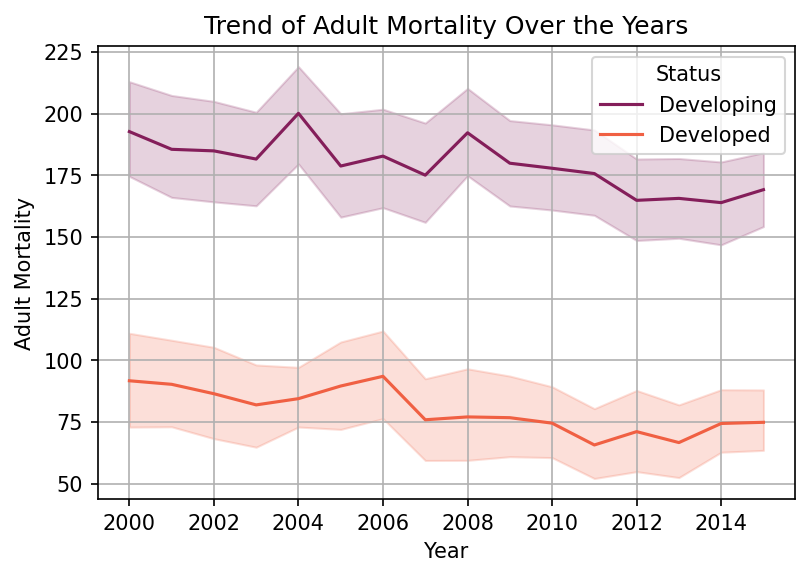

In [31]:
plt.figure(dpi=150)
sns.lineplot(data=df1, x='Year', y='Adult Mortality', hue='Status', palette='rocket')
plt.title('Trend of Adult Mortality Over the Years')
plt.xlabel('Year')
plt.ylabel('Adult Mortality')
plt.grid(True)
plt.show()


## Implementing Machine Learning Algorithm ##

### Linear Regression ###

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [33]:
## Loading the dataset 
data = pd.read_csv("C:\\Users\SENTHURAN\\OneDrive\\Desktop\\CleanedData.csv")
data.head()

,Unnamed: 0,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,Afghanistan,2015.0,Developing,65.0,263.0,55.0,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,3.108143e+07,15.35,15.6,0.479,10.1
1,1,Afghanistan,2014.0,Developing,59.9,271.0,55.0,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,3.275820e+05,15.35,15.6,0.476,10.0
2,2,Afghanistan,2013.0,Developing,59.9,268.0,55.0,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,3.108143e+07,15.35,15.6,0.470,9.9
3,3,Afghanistan,2012.0,Developing,59.5,272.0,55.0,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3.696958e+06,15.35,15.6,0.463,9.8
4,4,Afghanistan,2011.0,Developing,59.2,275.0,55.0,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2.978599e+06,15.35,15.6,0.454,9.5


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       2938 non-null   int64  
 1   Country                          2938 non-null   object 
 2   Year                             2938 non-null   float64
 3   Status                           2938 non-null   object 
 4   Life expectancy                  2938 non-null   float64
 5   Adult Mortality                  2938 non-null   float64
 6   infant deaths                    2938 non-null   float64
 7   Alcohol                          2938 non-null   float64
 8   percentage expenditure           2938 non-null   float64
 9   Hepatitis B                      2938 non-null   float64
 10  Measles                          2938 non-null   float64
 11   BMI                             2938 non-null   float64
 12  under-five deaths   

In [35]:
## Need to encode the 'Country' and 'Status' categorical columns into numerical values 
## Using LabelEncoder

lb_cunt = LabelEncoder()
lb_st = LabelEncoder()
data['Country'] = lb_cunt.fit_transform(data['Country'])
data['Status'] = lb_st.fit_transform(data['Status'])

#after encoding
data.head()

,Unnamed: 0,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,0,2015.0,1,65.0,263.0,55.0,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,3.108143e+07,15.35,15.6,0.479,10.1
1,1,0,2014.0,1,59.9,271.0,55.0,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,3.275820e+05,15.35,15.6,0.476,10.0
2,2,0,2013.0,1,59.9,268.0,55.0,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,3.108143e+07,15.35,15.6,0.470,9.9
3,3,0,2012.0,1,59.5,272.0,55.0,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3.696958e+06,15.35,15.6,0.463,9.8
4,4,0,2011.0,1,59.2,275.0,55.0,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2.978599e+06,15.35,15.6,0.454,9.5


In [36]:
## Defining the features and target variables
x = data.drop(columns=['Life expectancy '])
y = data['Life expectancy ']

In [37]:
## Splitting the data into training and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 20)


In [38]:
## Initializing the LinearRegression model
lr_model = LinearRegression()

In [39]:
## Training the model on train data
lr_model.fit(x_train,y_train)

LinearRegression()

In [40]:
# Display the coefficients and intercept of the model

print(f"Coefficients : {lr_model.coef_}")
print(f"Intercepts : {lr_model.intercept_}")

Coefficients : [ 1.53543450e-02 -2.27913548e-01  1.46051620e-02 -1.76881711e+00
 -1.84682942e-02 -7.55603096e-02 -2.06686998e-02  1.52689788e-03
 -2.46244379e-02 -2.30535471e-06  2.72213450e-02  8.20549123e-04
  7.99117815e-03  6.53191723e-02  1.02433913e-01 -5.08988637e-01
  1.28202453e-05  5.16481097e-08 -1.21104920e-01  4.24597145e-02
  9.33880500e+00  4.00432574e-01]
Intercepts : 25.426653061605414


In [41]:
# Make predictions on the test set
y_pred = lr_model.predict(x_test)

In [42]:
#Model Evaluation 
# Calculate and display the Mean Squared Error (MSE) and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [43]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 14.289962502077534
R-squared (R2): 0.836144729817338


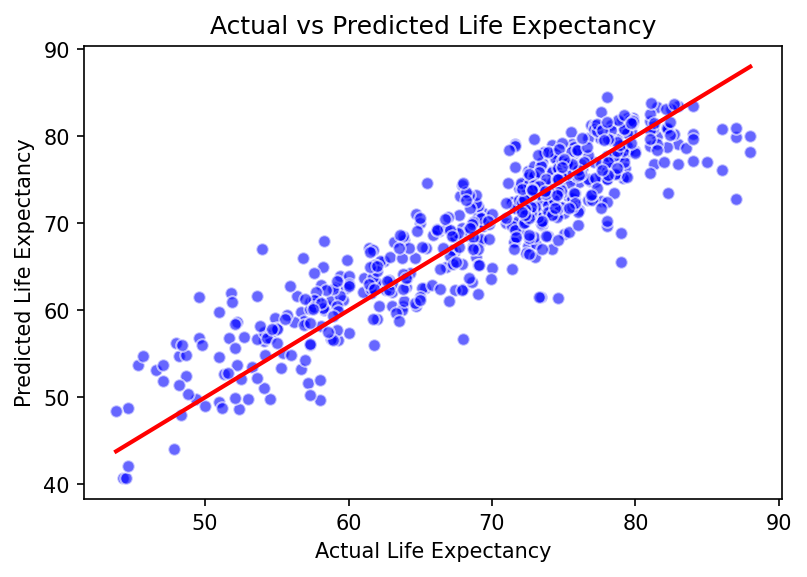

In [44]:
# Plotting the Actual vs Predicted values
plt.figure(dpi=150)
plt.scatter(y_test, y_pred, color='blue', edgecolor='w', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.show()